In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Reading the input file and splitting it into train and test

In [3]:
df_train = pd.read_csv('/Users/karunparashar/Downloads/mtx/Train_rsmpl.csv')
df = df_train.copy(deep=True)
X_resampled = df.iloc[:,0:52]
y_resampled = df.iloc[:,52]
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.8,test_size=0.2,
                                                    random_state = 7)

In [10]:
#Random Forest
#defining base classifier
rfc=  RandomForestClassifier()

#parameters to be tuned
param_grid_RF = { "n_estimators" : [100,1000,2000],
                  'max_features': ['auto', 'sqrt']}

#grid search initialisation
grid_RF = RandomizedSearchCV(rfc, param_grid_RF, cv = 2,verbose = 3)

#training on model created using grid search
RF_model = grid_RF.fit(x_train, y_train)

#predictions based on this model
grid_predictions_RF = RF_model.predict(x_test) 

#calculating accuracy
RF_acc_grid = accuracy_score(y_test,grid_predictions_RF)
RF_acc_grid

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] n_estimators=100, max_features=auto .............................
[CV]  n_estimators=100, max_features=auto, score=0.9160754249797629, total=   8.4s
[CV] n_estimators=100, max_features=auto .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


[CV]  n_estimators=100, max_features=auto, score=0.9162817277013191, total=   9.0s
[CV] n_estimators=1000, max_features=auto ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.8s remaining:    0.0s


[CV]  n_estimators=1000, max_features=auto, score=0.9182896052568925, total= 1.7min
[CV] n_estimators=1000, max_features=auto ............................
[CV]  n_estimators=1000, max_features=auto, score=0.9181151483403972, total= 1.6min
[CV] n_estimators=2000, max_features=auto ............................
[CV]  n_estimators=2000, max_features=auto, score=0.9184800723775058, total= 3.3min
[CV] n_estimators=2000, max_features=auto ............................
[CV]  n_estimators=2000, max_features=auto, score=0.9189009000428592, total= 3.7min
[CV] n_estimators=100, max_features=sqrt .............................
[CV]  n_estimators=100, max_features=sqrt, score=0.9170039521927528, total=  11.5s
[CV] n_estimators=100, max_features=sqrt .............................
[CV]  n_estimators=100, max_features=sqrt, score=0.9164007809895709, total=  11.9s
[CV] n_estimators=1000, max_features=sqrt ............................
[CV]  n_estimators=1000, max_features=sqrt, score=0.9184324555973525, to

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 23.5min finished


NameError: name 'accuracy_score' is not defined

In [39]:
RF_acc_grid = accuracy_score(y_test,grid_predictions_RF)

0.9281876973916336


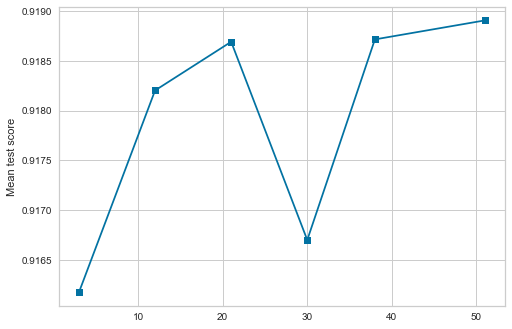

In [31]:
# visualising results based on cross validation by grid search
RF_grid_results =grid_RF.cv_results_
plt.plot(np.array([3,12,21,30,38,51]),RF_grid_results['mean_test_score'],marker='s')
plt.title('')
plt.xlabel('') 
plt.ylabel('Mean test score') 
plt.show()

Evaluating the performance on test data

In [38]:
df_test = pd.read_csv('/Users/karunparashar/Downloads/mtx/Tst_rsmpl.csv')
df_test.Plant_Type[df_test.Plant_Type=="Myconid:"]='Myconid'
x_tet =df_test.iloc[:,0:52]
y_tet = df_test.iloc[:,52]

y_RF_test = RF_model.predict(x_tet)
print("Random Forest Accuracy-",accuracy_score(y_RF_test,y_tet))

Random Forest Accuracy- 0.9281876973916336


In [22]:
df_Rf = pd.DataFrame(data = grid_RF.cv_results_)
best_params = df_Rf.params[df_Rf.rank_test_score==1]
best_params

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.

5    {'n_estimators': 2000, 'max_features': 'sqrt'}
Name: params, dtype: object

Hence the model performs decently with number of features > 10 and the mean test score oscillate in a 0.05 range after that

In [36]:
cr = classification_report(y_RF_test,y_tet)
print(cr)

               precision    recall  f1-score   support

     Ascomoid       0.87      0.87      0.87     42387
Assassin vine       0.83      0.92      0.87     51455
   Basidirond       0.93      0.86      0.89      7853
    Dark tree       0.95      0.82      0.88       652
 Hangman tree       0.97      0.48      0.64      3794
       Kelpie       0.95      0.69      0.80      4763
      Myconid       0.99      0.77      0.87      5299

    micro avg       0.86      0.86      0.86    116203
    macro avg       0.93      0.77      0.83    116203
 weighted avg       0.87      0.86      0.86    116203



Here we have fairly accurate results because each class has great precision and recall scores along with consistent F1 scores

Hence this model has performed on par with our expectations